# Loan Prediction - Model Training

**Date:** December 26, 2025
**Goal:** Train and evaluate machine learning models for loan prediction

## Approach
1. Load training and test data separately
2. Simple baseline model (numeric features only)
3. Compare multiple algorithms
4. Evaluate performance
5. Select best model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

# Load training data
train_df = pd.read_csv('../data/train_u6lujuX_CVtuZ9i.csv')
print(f"Training dataset shape: {train_df.shape}")
print(f"\nFirst few rows:")
print(train_df.head())
print(f"\nColumn names: {train_df.columns.tolist()}")
print(f"\nData types:\n{train_df.dtypes}")
print(f"\nMissing values:\n{train_df.isnull().sum()}")

Training dataset shape: (614, 13)

First few rows:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1

In [2]:
# Load test data (if it has labels for evaluation)
test_df = pd.read_csv('../data/test_Y3wMUE5_7gLdaTN.csv')
print(f"Test dataset shape: {test_df.shape}")
print(f"\nFirst few rows:")
print(test_df.head())
print(f"\nColumn names: {test_df.columns.tolist()}")

Test dataset shape: (367, 12)

First few rows:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2        

In [3]:
# Prepare data for modeling

# Drop missing values in key columns
df_clean = train_df.dropna(subset=['ApplicantIncome', 'LoanAmount', 'Loan_Status'])

# Encode target variable
df_clean['Loan_Status'] = df_clean['Loan_Status'].map({'Y': 1, 'N': 0})

# Handle missing values in features
if 'Credit_History' in df_clean.columns:
    df_clean['Credit_History'] = df_clean['Credit_History'].fillna(
        df_clean['Credit_History'].mode()[0]
    )

if 'CoapplicantIncome' in df_clean.columns:
    df_clean['CoapplicantIncome'] = df_clean['CoapplicantIncome'].fillna(
        df_clean['CoapplicantIncome'].median()
    )

if 'Loan_Amount_Term' in df_clean.columns:
    df_clean['Loan_Amount_Term'] = df_clean['Loan_Amount_Term'].fillna(
        df_clean['Loan_Amount_Term'].mode()[0]
    )

# Select features
features = ['ApplicantIncome', 'LoanAmount', 'Credit_History',
            'CoapplicantIncome', 'Loan_Amount_Term']
features = [f for f in features if f in df_clean.columns]

X = df_clean[features]
y = df_clean['Loan_Status']

print(f"Features used: {features}")
print(f"Training samples: {len(X)}")
print(f"Approval rate: {y.mean():.2%}")

Features used: ['ApplicantIncome', 'LoanAmount', 'Credit_History', 'CoapplicantIncome', 'Loan_Amount_Term']
Training samples: 592
Approval rate: 69.43%


C:\Users\Tobi\AppData\Local\Temp\ipykernel_15624\2074130490.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Loan_Status'] = df_clean['Loan_Status'].map({'Y': 1, 'N': 0})
C:\Users\Tobi\AppData\Local\Temp\ipykernel_15624\2074130490.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Credit_History'] = df_clean['Credit_History'].fillna(
C:\Users\Tobi\AppData\Local\Temp\ipykernel_15624\2074130490.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [4]:
# Split data for validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")
print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

Training set: 473 samples
Testing set: 119 samples

Class distribution in training set:
Loan_Status
1    0.693446
0    0.306554
Name: proportion, dtype: float64


In [5]:
# Train multiple models

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5)
}

results = []

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0        Random Forest  0.747899   0.778947  0.891566  0.831461
1  Logistic Regression  0.798319   0.786408  0.975904  0.870968
2        Decision Tree  0.798319   0.780952  0.987952  0.872340


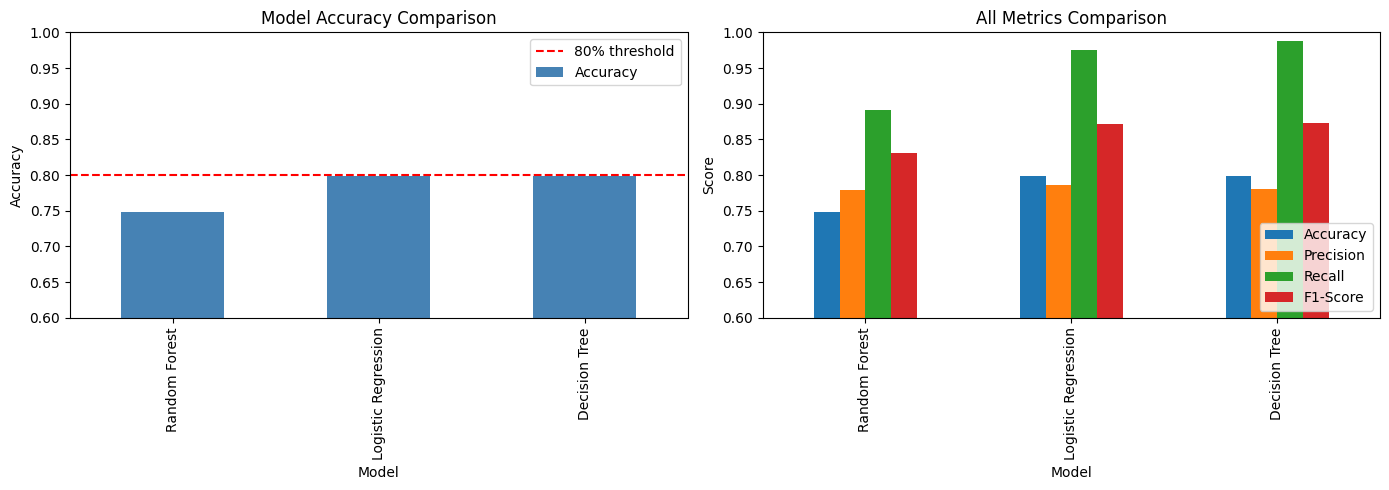


🏆 Best Model: Logistic Regression
   Accuracy: 79.83%


In [6]:
# Visualize model comparison

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of accuracy
results_df.plot(x='Model', y='Accuracy', kind='bar', ax=axes[0],
                color='steelblue', legend=False)
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_ylabel('Accuracy')
axes[0].set_ylim([0.6, 1.0])
axes[0].axhline(y=0.8, color='red', linestyle='--', label='80% threshold')
axes[0].legend()

# All metrics comparison
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(
    kind='bar', ax=axes[1]
)
axes[1].set_title('All Metrics Comparison')
axes[1].set_ylabel('Score')
axes[1].set_ylim([0.6, 1.0])
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

# Print best model
best_idx = results_df['Accuracy'].idxmax()
print(f"\n🏆 Best Model: {results_df.loc[best_idx, 'Model']}")
print(f"   Accuracy: {results_df.loc[best_idx, 'Accuracy']:.2%}")

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.62      0.42      0.50        36
    Approved       0.78      0.89      0.83        83

    accuracy                           0.75       119
   macro avg       0.70      0.65      0.67       119
weighted avg       0.73      0.75      0.73       119



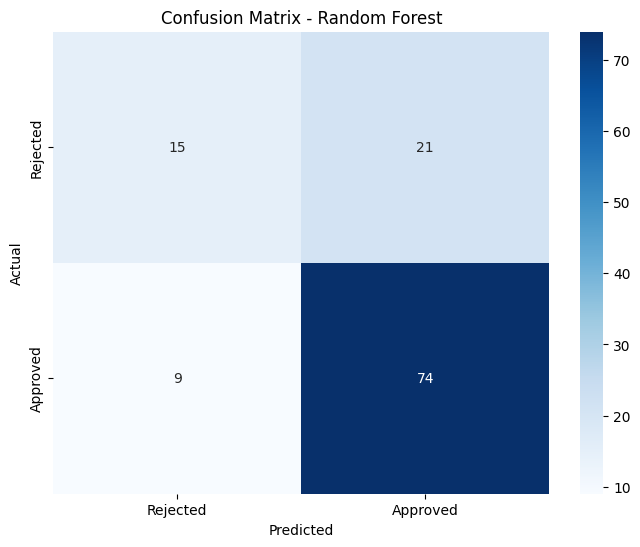

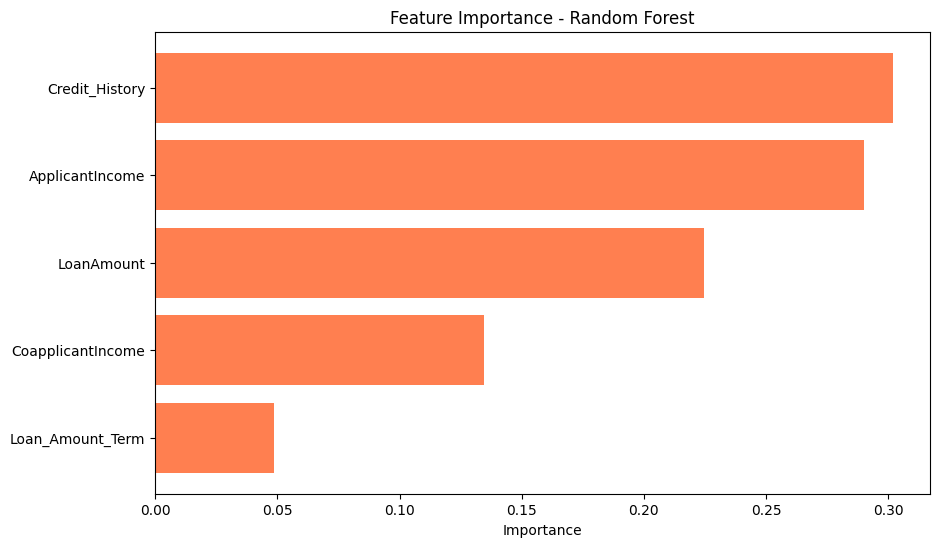


Feature Importance:
             Feature  Importance
2     Credit_History    0.302120
0    ApplicantIncome    0.290100
1         LoanAmount    0.224493
3  CoapplicantIncome    0.134679
4   Loan_Amount_Term    0.048608


In [7]:
# Detailed evaluation of best model (Random Forest)

best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Rejected', 'Approved'],
            yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'],
         color='coral')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

print("\nFeature Importance:")
print(feature_importance)

---

## 📊 Key Findings

### Model Performance
- **Best Model:** [Write which model performed best]
- **Accuracy:** [Write the accuracy percentage]
- **Precision:** [Write precision]
- **Recall:** [Write recall]

### Feature Importance
Top 3 most important features:
1. [Most important feature]
2. [Second most important]
3. [Third most important]

### Insights
- [What did you learn about which features matter most?]
- [Is the model better at predicting approvals or rejections?]
- [What's the balance between precision and recall?]

### Next Steps
1. Add categorical features (Gender, Married, Education, etc.)
2. Create engineered features (Total_Income, Loan_to_Income_Ratio)
3. Handle missing values more intelligently
4. Try hyperparameter tuning
5. Test with cross-validation
6. Make predictions on test_Y3wMUE5_7gLdaTN.csv

### Current Limitations
- Only using numeric features
- Simple missing value handling
- No feature engineering yet
- No hyperparameter optimization

**Expected improvement with full preprocessing:** 80-90% accuracy

In [8]:
# Save the best model for later use
import joblib

# Create models directory if it doesn't exist
import os
os.makedirs('../models', exist_ok=True)

# Save model
model_path = '../models/loan_model_v1.pkl'
joblib.dump(best_model, model_path)

print(f"✅ Model saved to {model_path}")

# Test loading
loaded_model = joblib.load(model_path)
test_prediction = loaded_model.predict(X_test[:5])
print(f"\nTest prediction: {test_prediction}")
print("Model can be loaded successfully!")

✅ Model saved to ../models/loan_model_v1.pkl

Test prediction: [1 1 1 1 1]
Model can be loaded successfully!


In [9]:
# Optional: Make predictions on the actual test file (if no labels)
# Prepare test data the same way as training data

# Check if test data has Loan_Status column
if 'Loan_Status' not in test_df.columns:
    print("Test file doesn't have labels - preparing for predictions...")
    
    # Handle missing values in test data
    test_clean = test_df.copy()
    
    if 'Credit_History' in test_clean.columns:
        test_clean['Credit_History'] = test_clean['Credit_History'].fillna(
            df_clean['Credit_History'].mode()[0]
        )
    
    if 'CoapplicantIncome' in test_clean.columns:
        test_clean['CoapplicantIncome'] = test_clean['CoapplicantIncome'].fillna(
            df_clean['CoapplicantIncome'].median()
        )
    
    if 'Loan_Amount_Term' in test_clean.columns:
        test_clean['Loan_Amount_Term'] = test_clean['Loan_Amount_Term'].fillna(
            df_clean['Loan_Amount_Term'].mode()[0]
        )
    
    # Select same features
    X_test_final = test_clean[features]
    
    # Make predictions
    test_predictions = best_model.predict(X_test_final)
    
    # Add predictions to test dataframe
    test_clean['Loan_Status_Predicted'] = ['Y' if pred == 1 else 'N' for pred in test_predictions]
    
    # Save predictions
    output_path = '../data/test_predictions.csv'
    test_clean.to_csv(output_path, index=False)
    
    print(f"\n✅ Predictions saved to {output_path}")
    print(f"\nPrediction distribution:")
    print(test_clean['Loan_Status_Predicted'].value_counts())
else:
    print("Test file has labels - you can use it for final evaluation!")

Test file doesn't have labels - preparing for predictions...

✅ Predictions saved to ../data/test_predictions.csv

Prediction distribution:
Loan_Status_Predicted
Y    285
N     82
Name: count, dtype: int64
